##### Initialization: definition of robots and coordinates

In [1]:
import numpy as np
from UAV import *
import random
import matplotlib.pyplot as plt   


n_robots = 3#int(input("number of robots: "))
n_components = 2
platoon = []


# initialization of n robots
for i in range(n_robots):
    #if i==0:
    #    i_robot = Robot("op_" + str(i),0,0,0)
    #else:
    i_robot = Robot("op_" + str(i),random.uniform(0, 10.0),random.uniform(0, 10.0),0)
    platoon.append(i_robot)

coordinates = [[],[],[]]

for rob in platoon:
    coordinates = np.append(coordinates,rob.get_coords(),axis=1)

#TRUE COORDINATES [REALITY: THEY ARE UNKNOWN]
S = coordinates[0:2,:]

print(S)

[[7.13789683 9.10019425 7.99557024]
 [9.98812933 4.34708366 3.07452286]]


##### Definition of the (squared) distance matrix

In [2]:
DM2 = d_matrix2(platoon) #squared distance matrix -> for formulas
print(DM2)

[[ 0.         35.67200745 48.53355804]
 [35.67200745  0.          2.83960517]
 [48.53355804  2.83960517  0.        ]]


##### S* estimation through EigenValue Decomposition

In [3]:
S_star = EVD(DM2,n_components)
print(S_star)

[[-4.81804688  1.42363019  2.24066869]
 [ 0.13442128 -0.82832433  0.81532605]]


The new coordinates may be affected by rotation and flip ambiguities. Thus we must solve the problem with further analysis

##### Identification of rotation ambiguity

DM' : a new acquisition for the distances

We now introduce a displacement for the anchor, in order to build a new (squared) distance matrix.

In reality what we do is applying a displacement to the anchor and we get a new distance matrix

In [4]:
deltaX1 = deltaY1 = 0.1

DeltaS_prime = np.array([[0 for i in range(n_robots)] for j in range(2)],dtype=float)
DeltaS_prime[:,0] = [deltaX1,deltaY1]

S_prime = S + DeltaS_prime
print(S_prime)

DM_prime = DM_from_S(S_prime,verbose=1)

[[ 7.23789683  9.10019425  7.99557024]
 [10.08812933  4.34708366  3.07452286]]
DM' :
 [[ 0.         36.4277571  49.76474465]
 [36.4277571   0.          2.83960517]
 [49.76474465  2.83960517  0.        ]]


Estimation of the rotation angle $\theta_r$

In [5]:
theta_r = estimate_theta(DM2,DM_prime,S_star,[deltaX1,deltaY1],verbose=1)

Coordinates to work with: 1-th and 2-th
After normalization: 
cos(theta):	-0.739677
sin(theta):	0.672962

Actual theta:	 2.4033861407574637
Approx theta:	Disabled


S** : estimated-rotated coordinates

In [6]:
S_star2 = rotateMatrix(theta_r)@S_star

##### Identification of flip ambiguity

We have to check if there is any flip ambiguity. To do so, we have to move the anchor one more time

In [7]:
deltaX2 = 0.3
deltaY2 = 0.4

DeltaS_prime2 = np.array([[0 for i in range(n_robots)] for j in range(2)],dtype=float)
DeltaS_prime2[:,0] = [deltaX2,deltaY2]

S_prime2 = S + DeltaS_prime2
print(S_prime)

DM_prime2 = DM_from_S(S_prime2,verbose=1)

[[ 7.23789683  9.10019425  7.99557024]
 [10.08812933  4.34708366  3.07452286]]
DM' :
 [[ 0.         39.25746554 53.79983917]
 [39.25746554  0.          2.83960517]
 [53.79983917  2.83960517  0.        ]]


Now we estimate a second rotation angle $\theta_{r2}$: if = 0, no flip ambiguity

Wrong estimated angle: 2.4033861407574637
True  estimated angle: -0.8325898139625673


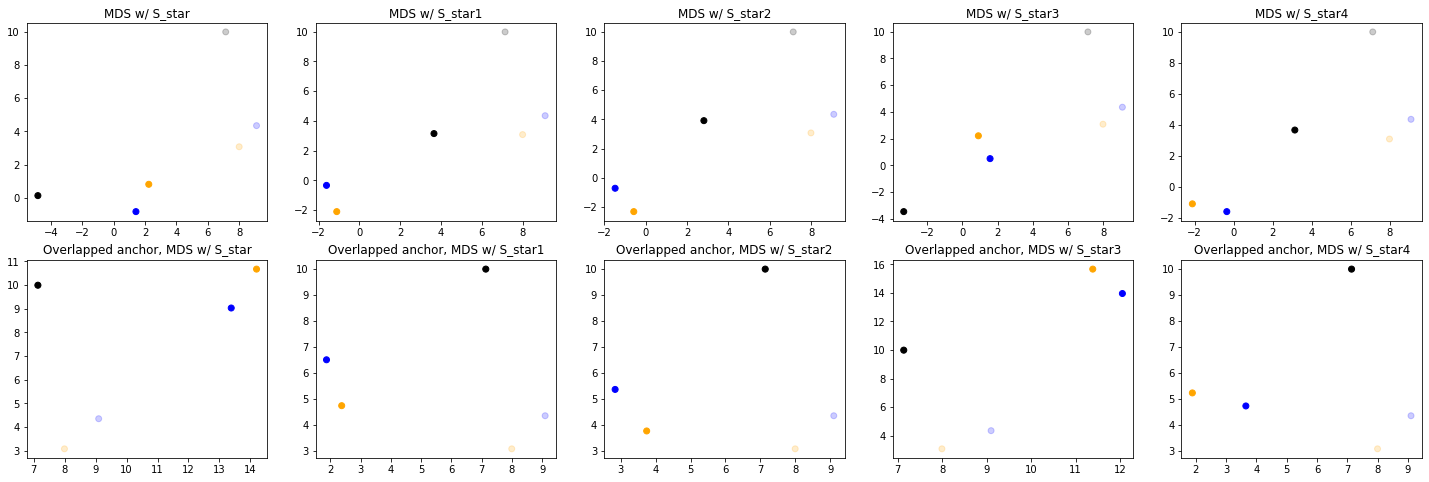

In [8]:
theta_r2 = estimate_theta(DM2,DM_prime2,S_star2,[deltaX2,deltaY2],verbose=0)

S_star3 = np.copy(S_star)
S_star4 = np.copy(S_star)

if (theta_r2 != 0):
    F = np.array([[-1,0],[0,1]])
    
    theta_r3 = estimate_theta(DM2,DM_prime,F@S_star,[deltaX1,deltaY1],verbose=0)

    print("Wrong estimated angle:",theta_r)
    print("True  estimated angle:", theta_r3)

    S_star3 = rotateMatrix(theta_r3)@F@S_star
    S_star4 = rotateMatrix(theta_r3)@S_star

plot_points(S,S_star  = S_star,
              S_star1 = rotateMatrix(theta_r)@S_star,
              S_star2 = rotateMatrix(theta_r+theta_r2)@S_star,
              S_star3 = rotateMatrix(theta_r3)@S_star,
              S_star4 = rotateMatrix(theta_r3)@F@S_star,
              match = 1
            )

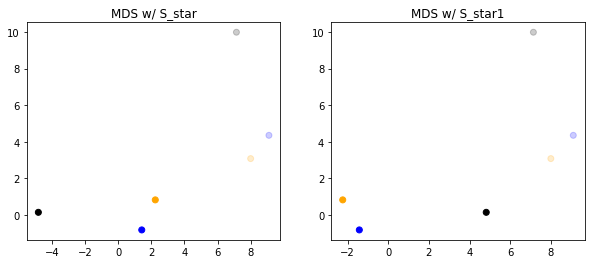

In [9]:
plot_points(S,S_star  = S_star,
              S_star1 = F@S_star
            )